In [1]:
# Escenario 3: Balancear la cantidad de registros según la variable target y usar solamente los registros completos.
# selecciono 150.000 registros por cada opción de mi target, 
# entonces son 150.000 con SI y 150.000 con NO (300.000 registros del total)
# solo se usan los datos que contienen todas las variables

In [2]:
# Cargar funciones de la librería de python data analysis
import pandas as pd 

# Leer csv con datos y cargar en el dataframe data
# data = pd.read_csv("data/analisis_desercion_2018.csv", sep=';', encoding = "ISO-8859-1") 
data2018 = pd.read_csv("data/analisis_desercion_2018.csv", sep=';', encoding = "ISO-8859-1") 
data2019 = pd.read_csv("data/analisis_desercion_2019.csv", sep=';', encoding = "ISO-8859-1") 
data2020 = pd.read_csv("data/analisis_desercion_2020.csv", sep=';', encoding = "ISO-8859-1") 

In [3]:
print ('Registros 2018: ' + str(data2018['estudiante_id'].count()))
print ('Registros 2019: ' + str(data2019['estudiante_id'].count()))
print ('Registros 2020: ' + str(data2020['estudiante_id'].count()))

Registros 2018: 1144031
Registros 2019: 1182570
Registros 2020: 1276005


In [4]:
# concatenar los 3 datasets
data = pd.concat([data2018,data2019,data2020])
# Preview de las 5 primeras filas de data 
data.head()

,estudiante_id,grado_curso,edad,tiene_sobreedad,tipo_documento,sexo,es_indigena,idioma,tipo_gestion_id,tipo_zona_id,...,cuantas_personas_vive,cuantas_piezas_dormir,recibe_beneficio,como_se_traslada_escuela,cuanto_tiempo_tarda,recibe_alimentacion,nivel_pobreza,matriculado_periodo_actual,estudiante_id_posible,desertor
0,3,11,13,0,1,1,0,Castellano,1,1,...,4,1,1,Caminando,Menos de 30 minutos,0,3.420555,1,NaN,0
1,4,6,8,0,1,2,0,Guaraní,1,1,...,4,1,0,Caminando,Menos de 30 minutos,0,20.333610,1,NaN,0
2,5,7,8,0,1,1,0,Castellano,1,1,...,4,2,0,Caminando,Menos de 30 minutos,0,23.435420,1,NaN,0
3,78,6,7,0,1,1,0,Castellano,1,1,...,4,2,0,En moto,Menos de 30 minutos,0,11.506870,0,NaN,1
4,13,7,8,0,1,1,0,Castellano,3,1,...,4,4,0,Caminando,Menos de 30 minutos,0,14.552570,1,NaN,0


In [5]:
# Identificar variables categoricas
df = data
df.dtypes[df.dtypes=='object']

idioma                      object
como_se_traslada_escuela    object
cuanto_tiempo_tarda         object
dtype: object

In [6]:
# cargar codificador por etiquetas (LabelEncoder)
from sklearn import preprocessing

# Codificar cada variable categorica con su propio encoder --> utilizo .astype(str) para convertir los valores a string
leIdioma = preprocessing.LabelEncoder()
df["idioma"] = leIdioma.fit_transform(df["idioma"].astype(str))
leComoSeTrasladaEscuela = preprocessing.LabelEncoder()
df["como_se_traslada_escuela"] = leComoSeTrasladaEscuela.fit_transform(df["como_se_traslada_escuela"].astype(str))
leCuantoTiempoTarda = preprocessing.LabelEncoder()
df["cuanto_tiempo_tarda"] = leCuantoTiempoTarda.fit_transform(df["cuanto_tiempo_tarda"].astype(str))

df.head()

,estudiante_id,grado_curso,edad,tiene_sobreedad,tipo_documento,sexo,es_indigena,idioma,tipo_gestion_id,tipo_zona_id,...,cuantas_personas_vive,cuantas_piezas_dormir,recibe_beneficio,como_se_traslada_escuela,cuanto_tiempo_tarda,recibe_alimentacion,nivel_pobreza,matriculado_periodo_actual,estudiante_id_posible,desertor
0,3,11,13,0,1,1,0,0,1,1,...,4,1,1,0,1,0,3.420555,1,NaN,0
1,4,6,8,0,1,2,0,1,1,1,...,4,1,0,0,1,0,20.333610,1,NaN,0
2,5,7,8,0,1,1,0,0,1,1,...,4,2,0,0,1,0,23.435420,1,NaN,0
3,78,6,7,0,1,1,0,0,1,1,...,4,2,0,2,1,0,11.506870,0,NaN,1
4,13,7,8,0,1,1,0,0,3,1,...,4,4,0,0,1,0,14.552570,1,NaN,0


In [7]:
# Verificar inversa de codificacion
leIdioma.inverse_transform(df["idioma"])
leComoSeTrasladaEscuela.inverse_transform(df["como_se_traslada_escuela"])
leCuantoTiempoTarda.inverse_transform(df["cuanto_tiempo_tarda"])

array(['Menos de 30 minutos', 'Menos de 30 minutos',
       'Menos de 30 minutos', ..., 'SIN DATO', 'SIN DATO', 'SIN DATO'],
      dtype=object)

In [8]:
#np.any(np.isnan(df))
#df.isnull().any()

In [9]:
#Importar svm model
from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np

###########################################################
### opcion de seleccionar filas que "estén completas" y con balanceo de valor target
df = df.loc[(df['cuantas_personas_vive'] != 0) 
                 & (df['cuantas_piezas_dormir'] != 0) 
                 & (df['como_se_traslada_escuela'] != 'SIN DATO')]
df1 = df[df['desertor'] == 1] 
df0 = df[df['desertor'] == 0] 

df1 = df1.iloc[:150000]
df0 = df0.iloc[:150000]

# concatenar los 2 df
dflimit = pd.concat([df0,df1])
###########################################################

# usar correlacion feature selection: True | False
featureSelection = False

if(featureSelection):
    # Correlación con desertor
    cm = df.corr()
    #print(cm.loc[(cm['desertor'].abs() > 0.10), 'desertor'])

    X = df.loc[:,[
                    'edad',
                    'repitio',
                    'aprobado_ordinario',
                    'aprobado_complementario',
                    'recibe_alimentacion',
                    'grado_curso'
               ]]
else:
    # se usan todas las variables input, menos estudiante_id_posible y matriculado_periodo_actual    
    X = dflimit.iloc[:,1:28]
    
# variable target
y = dflimit['desertor']   # NO=0, SI=1

# Split en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# verificar claves de target
#labels = np.unique(y)
#print(labels)

# Normalizacion a [0-1]
min_max_scaler_train = preprocessing.MinMaxScaler()
xNormTrain = pd.DataFrame(min_max_scaler_train.fit_transform(X_train.values))
min_max_scaler_test = preprocessing.MinMaxScaler()
xNormTest = pd.DataFrame(min_max_scaler_test.fit_transform(X_test.values))

#Crear el clasificador svm 
if(featureSelection):
    clf = svm.SVC(kernel='rbf', probability=1) # kernel={linear, rbf, poly, sigmoid}
else:
    # pruebas iniciales sin gridsearch
    #clf = svm.SVC(kernel='rbf', max_iter=1000, probability=1) # kernel={linear, rbf, poly, sigmoid}
    
    # prueba con resultado de gridsearch
    clf = svm.SVC(kernel='rbf', C=1, gamma=0.1, probability=1)     

#Train the model using the training sets
clf.fit(xNormTrain, y_train)

#Predict the response for test dataset
y_pred = clf.predict(xNormTest)

print("\nTrain Score:",clf.score(xNormTrain, y_train))
print("\nAccuracy:",metrics.accuracy_score(y_test, y_pred))
metrics.precision_recall_fscore_support(y_test, y_pred, average=None)


Train Score: 0.8191047619047619

Accuracy: 0.8180555555555555


(array([0.83038027, 0.80646066]),
 array([0.80144684, 0.83481405]),
 array([0.81565705, 0.82039245]),
 array([45202, 44798], dtype=int64))

In [10]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.83      0.80      0.82     45202
           1       0.81      0.83      0.82     44798

    accuracy                           0.82     90000
   macro avg       0.82      0.82      0.82     90000
weighted avg       0.82      0.82      0.82     90000



In [11]:
# Calcular matriz de confusion
pd.crosstab(y_test, y_pred, 
            rownames=['actual'], 
            colnames=['pred'], margins=False, margins_name="Total")

pred,0,1
actual,,
0,36227,8975
1,7400,37398


In [12]:
# Obtener scores de clasificación en las clases 0 o 1
y_scores = clf.predict_proba(xNormTest)

# Crear dataframe de predicciones con scores, filtrar segun criterio 
dp = pd.DataFrame(zip(y_test,y_pred,y_scores[:,0],y_scores[:,1]), columns=['actual','pred','prob_yes','prob_no'])
dp

,actual,pred,prob_yes,prob_no
0,1,1,0.005889,0.994111
1,0,0,0.859961,0.140039
2,0,0,0.825521,0.174479
3,1,0,0.802068,0.197932
4,0,0,0.834064,0.165936
...,...,...,...,...
89995,0,0,0.816203,0.183797
89996,0,0,0.825449,0.174551
89997,0,0,0.827736,0.172264
89998,1,1,0.010195,0.989805


0.9090533955628407


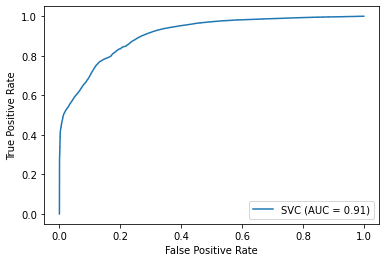

In [13]:
# ROC Curve
import numpy as np
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test, y_scores[:,1]))
metrics.plot_roc_curve(clf, xNormTest, y_test)